# Analysing general behaviour via tracked `trx.mat` data
Sharbat (on 2025-04-23) has decided to split up the Jupyter Notebook dealing with both Chore and `trx.mat` file processing into two notebooks.

This notebook deals with just the information read from the `trx.mat` files.


In [1]:
import os
import sys
import src.trx_processor as trx_processor
import matplotlib.pyplot as plt 
plt.style.use('../anemotaxis.mplstyle')
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
base_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n"
trx_path = os.path.join(base_path, "20240308_124423/trx.mat")
# trx_path = os.path.join(base_path, "20240304_151714/trx.mat")
# trx_path = os.path.join(base_path, "20240223_112627/trx.mat")
# trx_path = os.path.join(base_path, "20240301_105819/trx.mat")

In [3]:
# Process a single trx.mat file
date_str, extracted_data, metadata = trx_processor.process_single_file(trx_path)

print(f"\nProcessed file metadata:")
print(f"Date: {metadata['date']}")
print(f"Number of larvae: {metadata['n_larvae']}")

Processing larvae:   0%|          | 0/39 [00:00<?, ?it/s]


Processed file metadata:
Date: 2024-03-08 00:00:00
Number of larvae: 39


In [4]:
# Process all trx files in a directory tree
all_data = trx_processor.process_all_trx_files(base_path)

print(f"\nProcessed all files:")
print(f"Total experiments: {len(all_data['metadata']['experiments'])}")
print(f"Total larvae: {all_data['metadata']['total_larvae']}")  # Remove len() as total_larvae is already an integer

Found 8 trx.mat files


Processing trx files:   0%|          | 0/8 [00:00<?, ?it/s]

Processing larvae:   0%|          | 0/71 [00:00<?, ?it/s]

Processing larvae:   0%|          | 0/57 [00:00<?, ?it/s]

Processing larvae:   0%|          | 0/65 [00:00<?, ?it/s]

Processing larvae:   0%|          | 0/39 [00:00<?, ?it/s]

Processing larvae:   0%|          | 0/47 [00:00<?, ?it/s]

Processing larvae:   0%|          | 0/38 [00:00<?, ?it/s]

Processing larvae:   0%|          | 0/41 [00:00<?, ?it/s]

Processing larvae:   0%|          | 0/57 [00:00<?, ?it/s]


Processed 8 files
Total larvae: 415

Processed all files:
Total experiments: 8
Total larvae: 415


In [5]:
# Filter using percentile threshold (bottom 10% removed)
# filtered_data = trx_processor.filter_larvae_by_duration(extracted_data, percentile=10)

# Or specify minimum duration in seconds|
filtered_extracted_data = trx_processor.filter_larvae_by_duration(extracted_data, min_total_duration=300)
filtered_all_data = trx_processor.filter_larvae_by_duration(all_data, min_total_duration=300)

# Print filtering results
n_original = len(extracted_data)
n_filtered = len(filtered_extracted_data)
print(f"Filtered out {n_original - n_filtered} larvae ({(n_original - n_filtered)/n_original*100:.1f}%)")

Filtered out 16 larvae (41.0%)


/Users/sharbat/Projects/anemotaxis/src/trx_processor.py:756: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


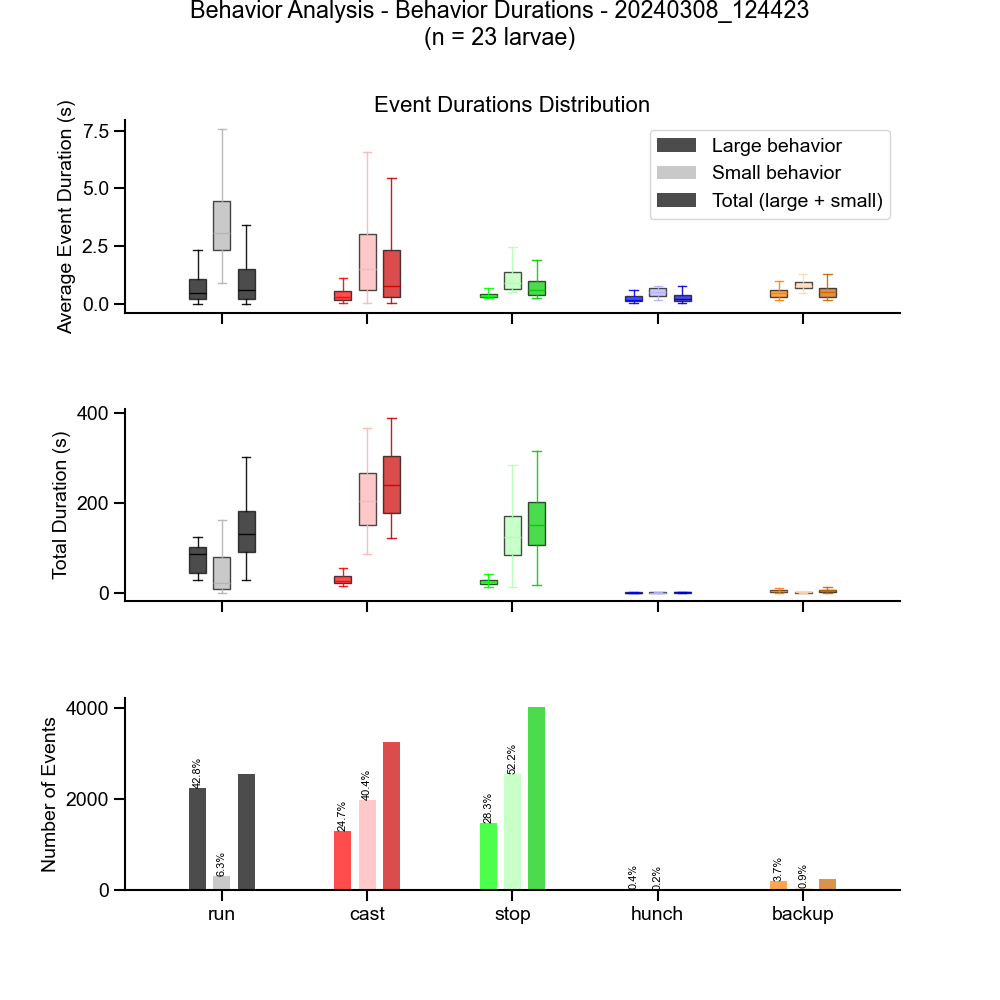


Large Behaviors analysis for Behavior Durations - 20240308_124423
Number of larvae: 23
Total actions: 5203

    Behavior   Events  %Total      Mean(s)  Median(s)
------------------------------------------------------------
         run:     2228   42.8%      0.79       0.45
        cast:     1284   24.7%      0.50       0.28
        stop:     1475   28.3%      0.37       0.34
       hunch:       21    0.4%      0.22       0.18
      backup:      195    3.7%      0.46       0.45

Small Behaviors analysis for Behavior Durations - 20240308_124423
Number of larvae: 23
Total actions: 4882

    Behavior   Events  %Total      Mean(s)  Median(s)
------------------------------------------------------------
         run:      309    6.3%      4.07       3.08
        cast:     1973   40.4%      2.49       1.51
        stop:     2546   52.2%      1.18       0.89
       hunch:        9    0.2%      0.48       0.50
      backup:       45    0.9%      0.83       0.76

Total Behaviors analysis for Be

In [6]:
# For all experiments
stats = trx_processor.analyze_behavior_durations(filtered_extracted_data, title=f"Behavior Durations - {date_str}")

/Users/sharbat/Projects/anemotaxis/src/trx_processor.py:756: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


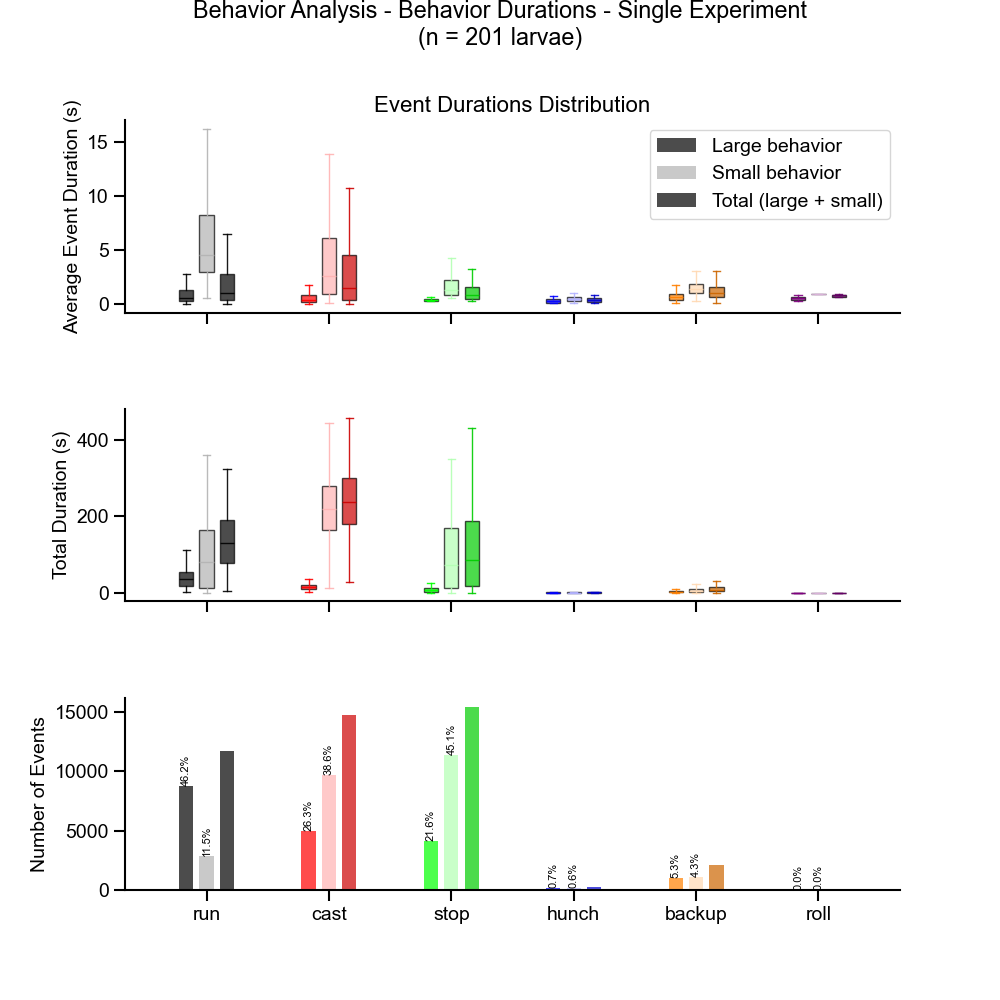


Large Behaviors analysis for Behavior Durations - Single Experiment
Number of larvae: 201
Total actions: 19019

    Behavior   Events  %Total      Mean(s)  Median(s)
------------------------------------------------------------
         run:     8783   46.2%      0.91       0.54
        cast:     4994   26.3%      0.70       0.34
        stop:     4105   21.6%      0.52       0.35
       hunch:      134    0.7%      0.29       0.25
      backup:     1001    5.3%      0.71       0.61
        roll:        2    0.0%      0.52       0.52

Small Behaviors analysis for Behavior Durations - Single Experiment
Number of larvae: 201
Total actions: 25124

    Behavior   Events  %Total      Mean(s)  Median(s)
------------------------------------------------------------
         run:     2878   11.5%      6.79       4.55
        cast:     9705   38.6%      4.63       2.59
        stop:    11319   45.1%      1.94       1.25
       hunch:      140    0.6%      0.45       0.43
      backup:     1081  

In [8]:
# For all experiments
stats = trx_processor.analyze_behavior_durations(filtered_all_data, title="Behavior Durations - Single Experiment")

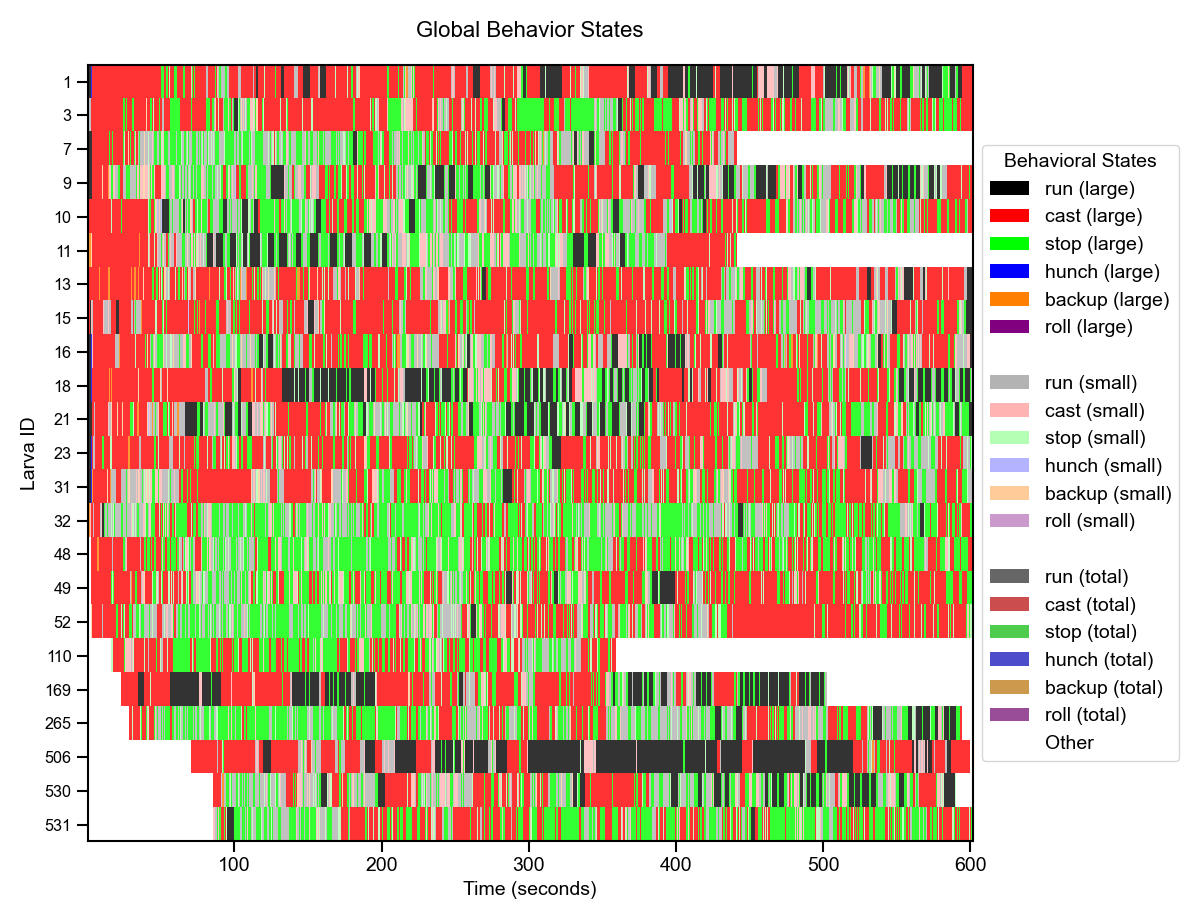

array([[[0. , 0. , 0. ],
        [0. , 0. , 0. ],
        [0. , 0. , 0. ],
        ...,
        [1. , 0. , 0. ],
        [1. , 0. , 0. ],
        [1. , 0. , 0. ]],

       [[0.7, 0.7, 0.7],
        [0.7, 0.7, 0.7],
        [0.7, 0.7, 0.7],
        ...,
        [1. , 0. , 0. ],
        [0.7, 1. , 0.7],
        [1. , 0. , 0. ]],

       [[0. , 0. , 0. ],
        [0. , 0. , 0. ],
        [0. , 0. , 0. ],
        ...,
        [1. , 1. , 1. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ]],

       ...,

       [[1. , 1. , 1. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ],
        ...,
        [1. , 1. , 1. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ]],

       [[1. , 1. , 1. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ],
        ...,
        [1. , 1. , 1. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ]],

       [[1. , 1. , 1. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ],
        ...,
        [0. , 1. , 0. ],
        [1. , 0. , 0. ],
        [1. , 0. , 0. ]]

In [9]:
# Show large, small, and total behavior rows
# trx_processor.plot_global_behavior_matrix(filtered_extracted_data, show_separate_totals=True)

# Or to show just one row per larva (original behavior)
trx_processor.plot_global_behavior_matrix(filtered_extracted_data, show_separate_totals=False)

In [10]:
# # Save video of the first larva's behavior
# first_larva = sorted(filtered_extracted_data.keys())[0]
# trx_processor.save_behavioral_contour_video(
#     filtered_extracted_data, 
#     first_larva,
#     output_path='../results/larva_behavior_withstates.mp4',
#     fps=20
# )

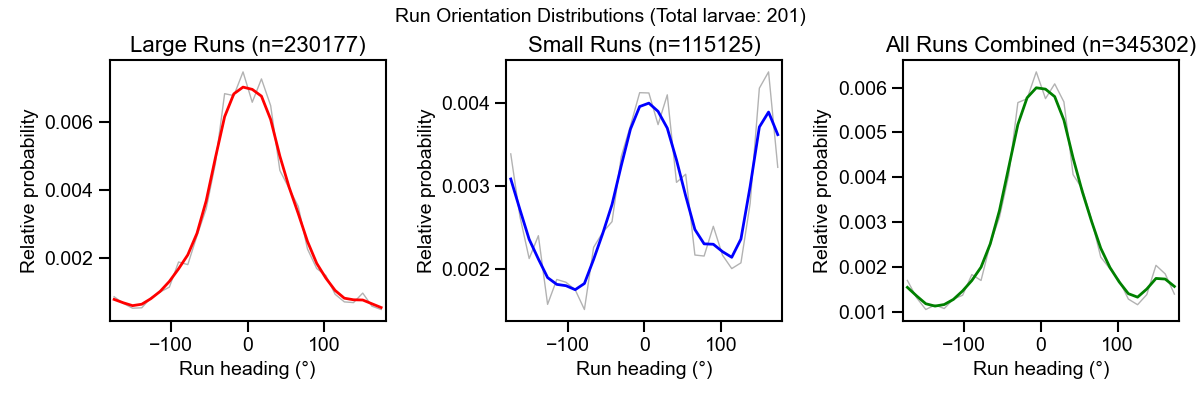

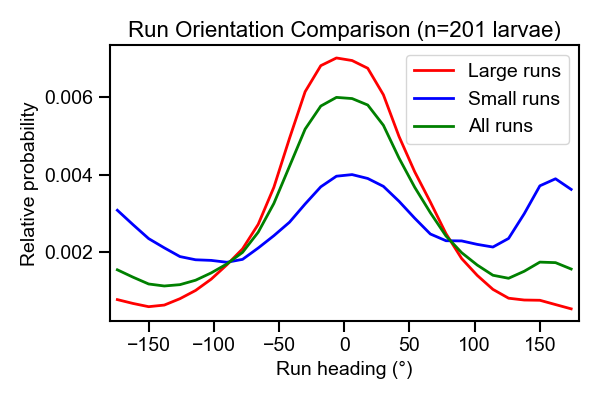

In [27]:
# For all experiments
all_exp_results = trx_processor.analyze_run_orientations_all(filtered_all_data)

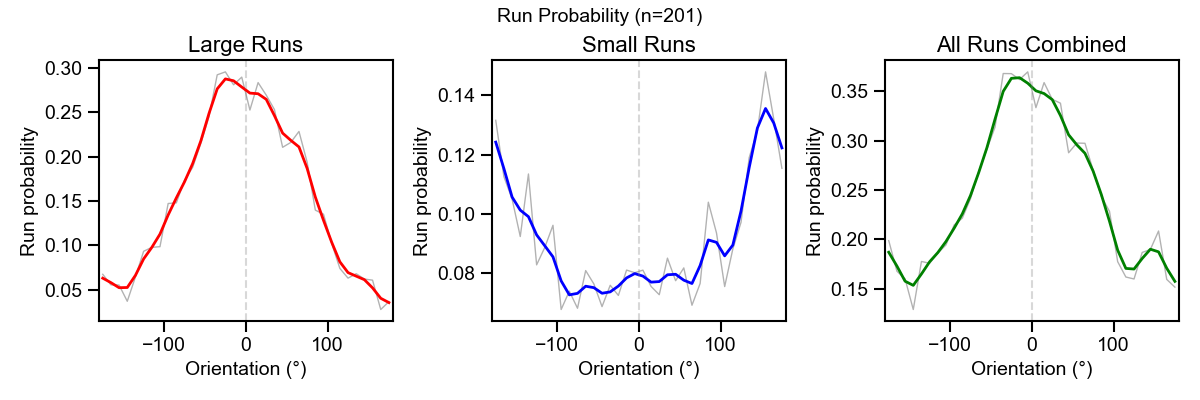

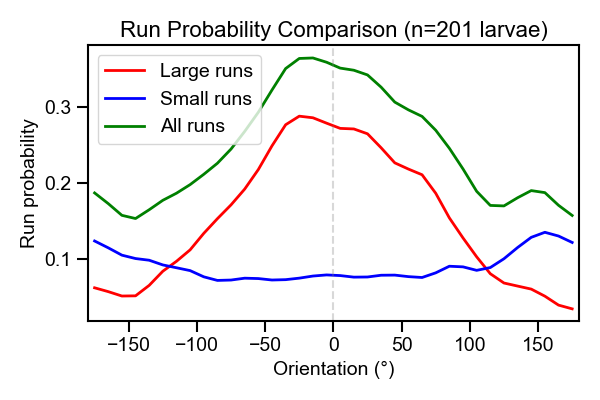

In [28]:
# Calculate run probability as a function of orientation
run_prob_results = trx_processor.analyze_run_rate_by_orientation(filtered_all_data)

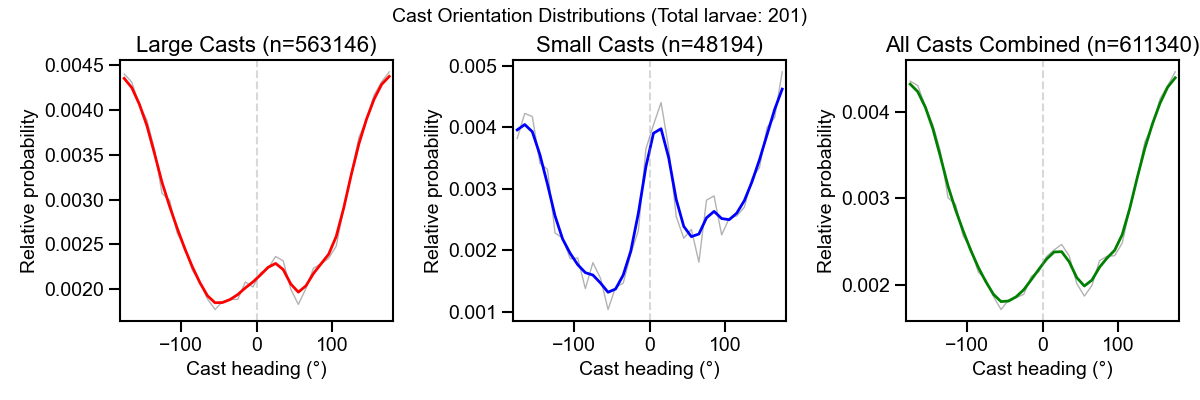

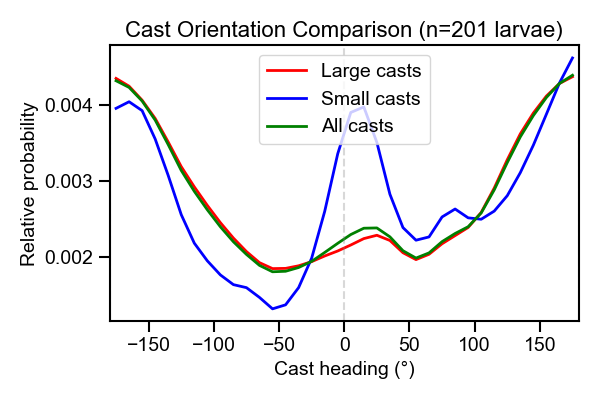

In [29]:
# Example usage
cast_results = trx_processor.analyze_cast_orientations_all(filtered_all_data)


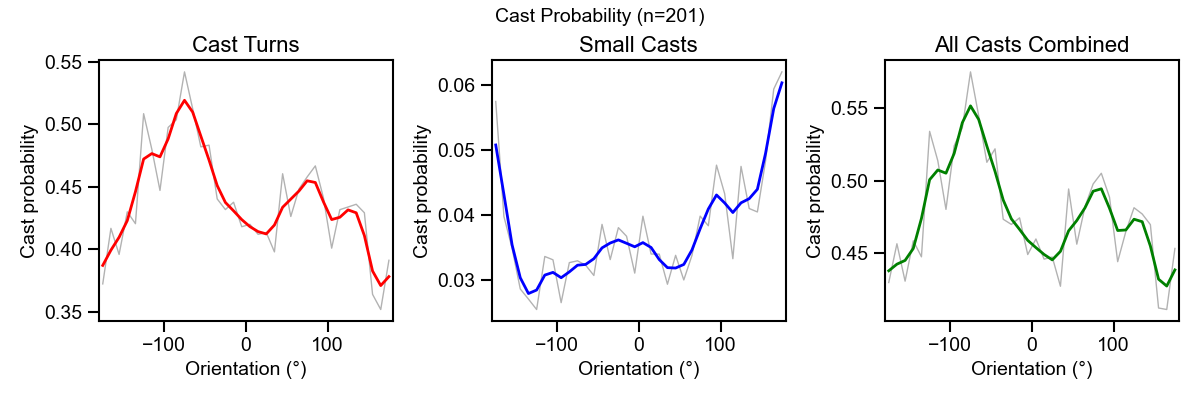

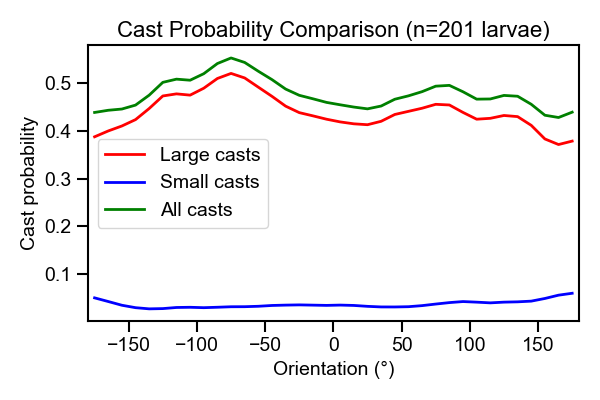

In [30]:
# Analyze all data
all_larvae_turns = trx_processor.analyze_turn_rate_by_orientation(filtered_all_data)

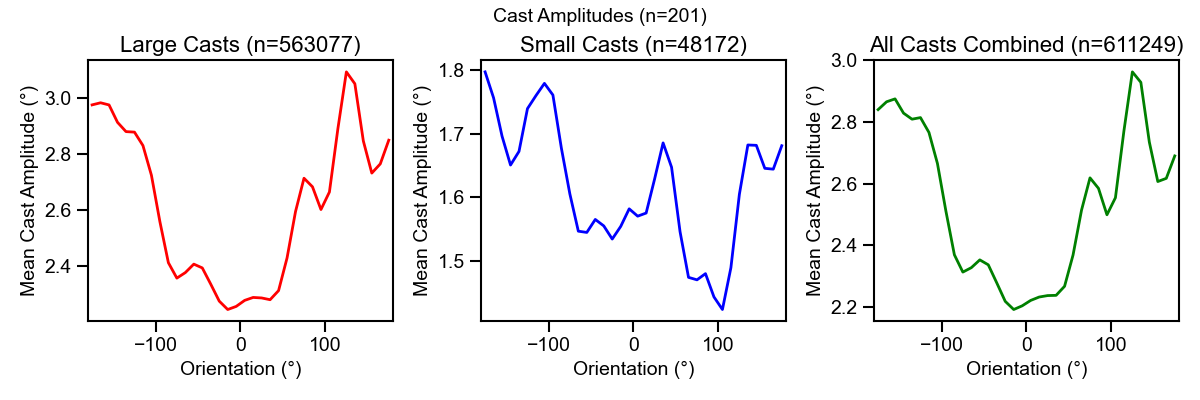

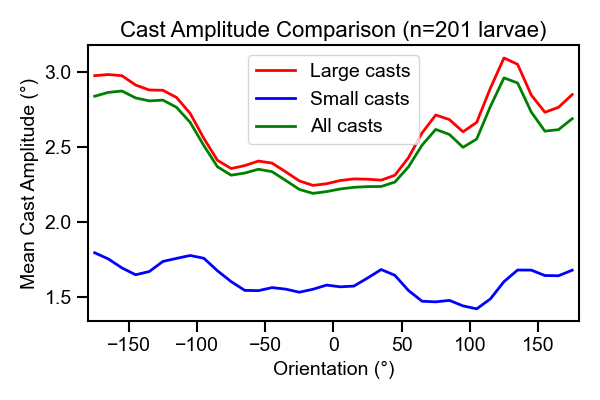

In [32]:
# Analyze all data
all_larvae_turns = trx_processor.analyze_turn_amplitudes_by_orientation(
    filtered_all_data
)

In [14]:
# Analyze turn rates in lateral quadrants
# lateral_stats = trx_processor.analyze_lateral_turn_rates(filtered_all_data, 
#                                          angle_width=15,
#                                          bin_width=5)

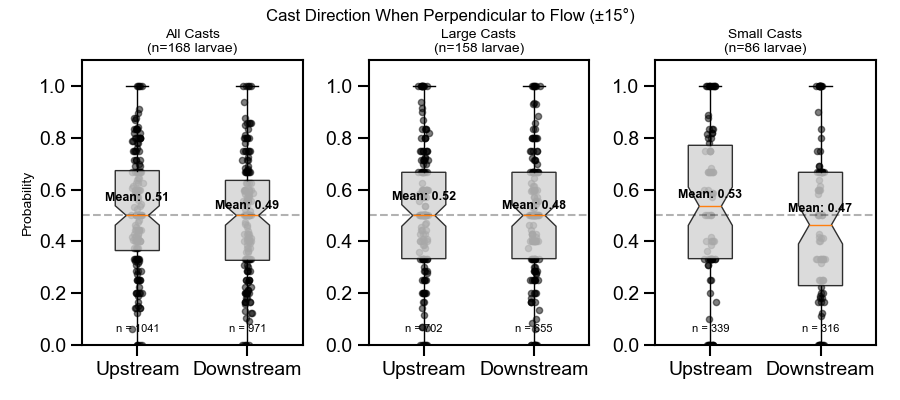

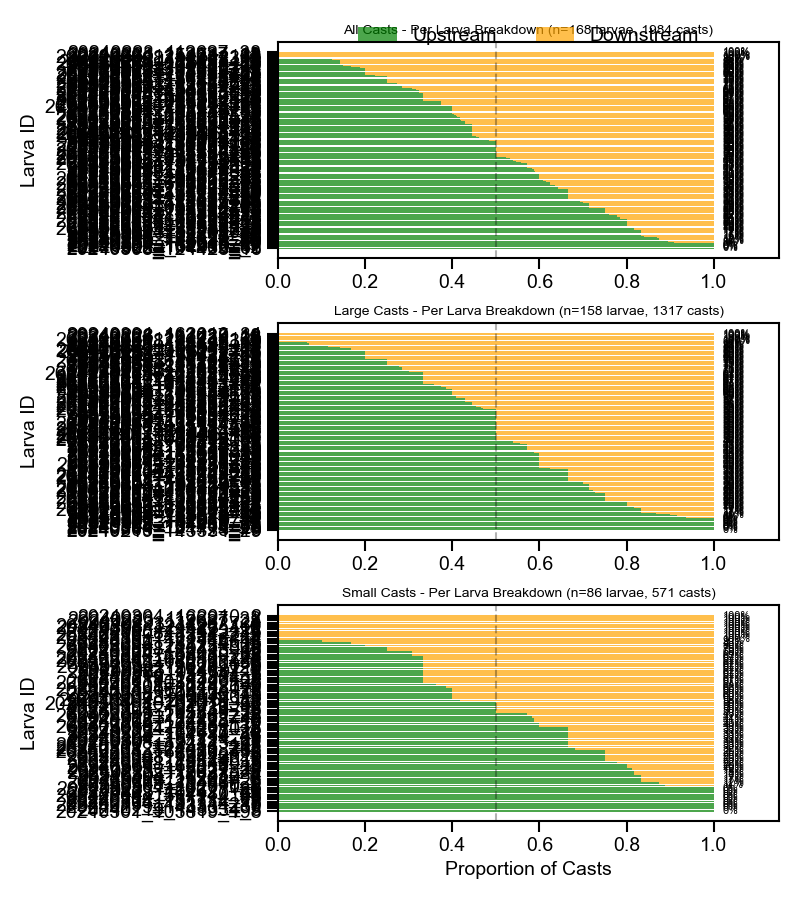

In [33]:
# Analyze cast directions relative to wind
cast_stats = trx_processor.analyze_perpendicular_cast_directions(filtered_all_data, angle_width=15)

Selected random larva: 20240308_124423_15


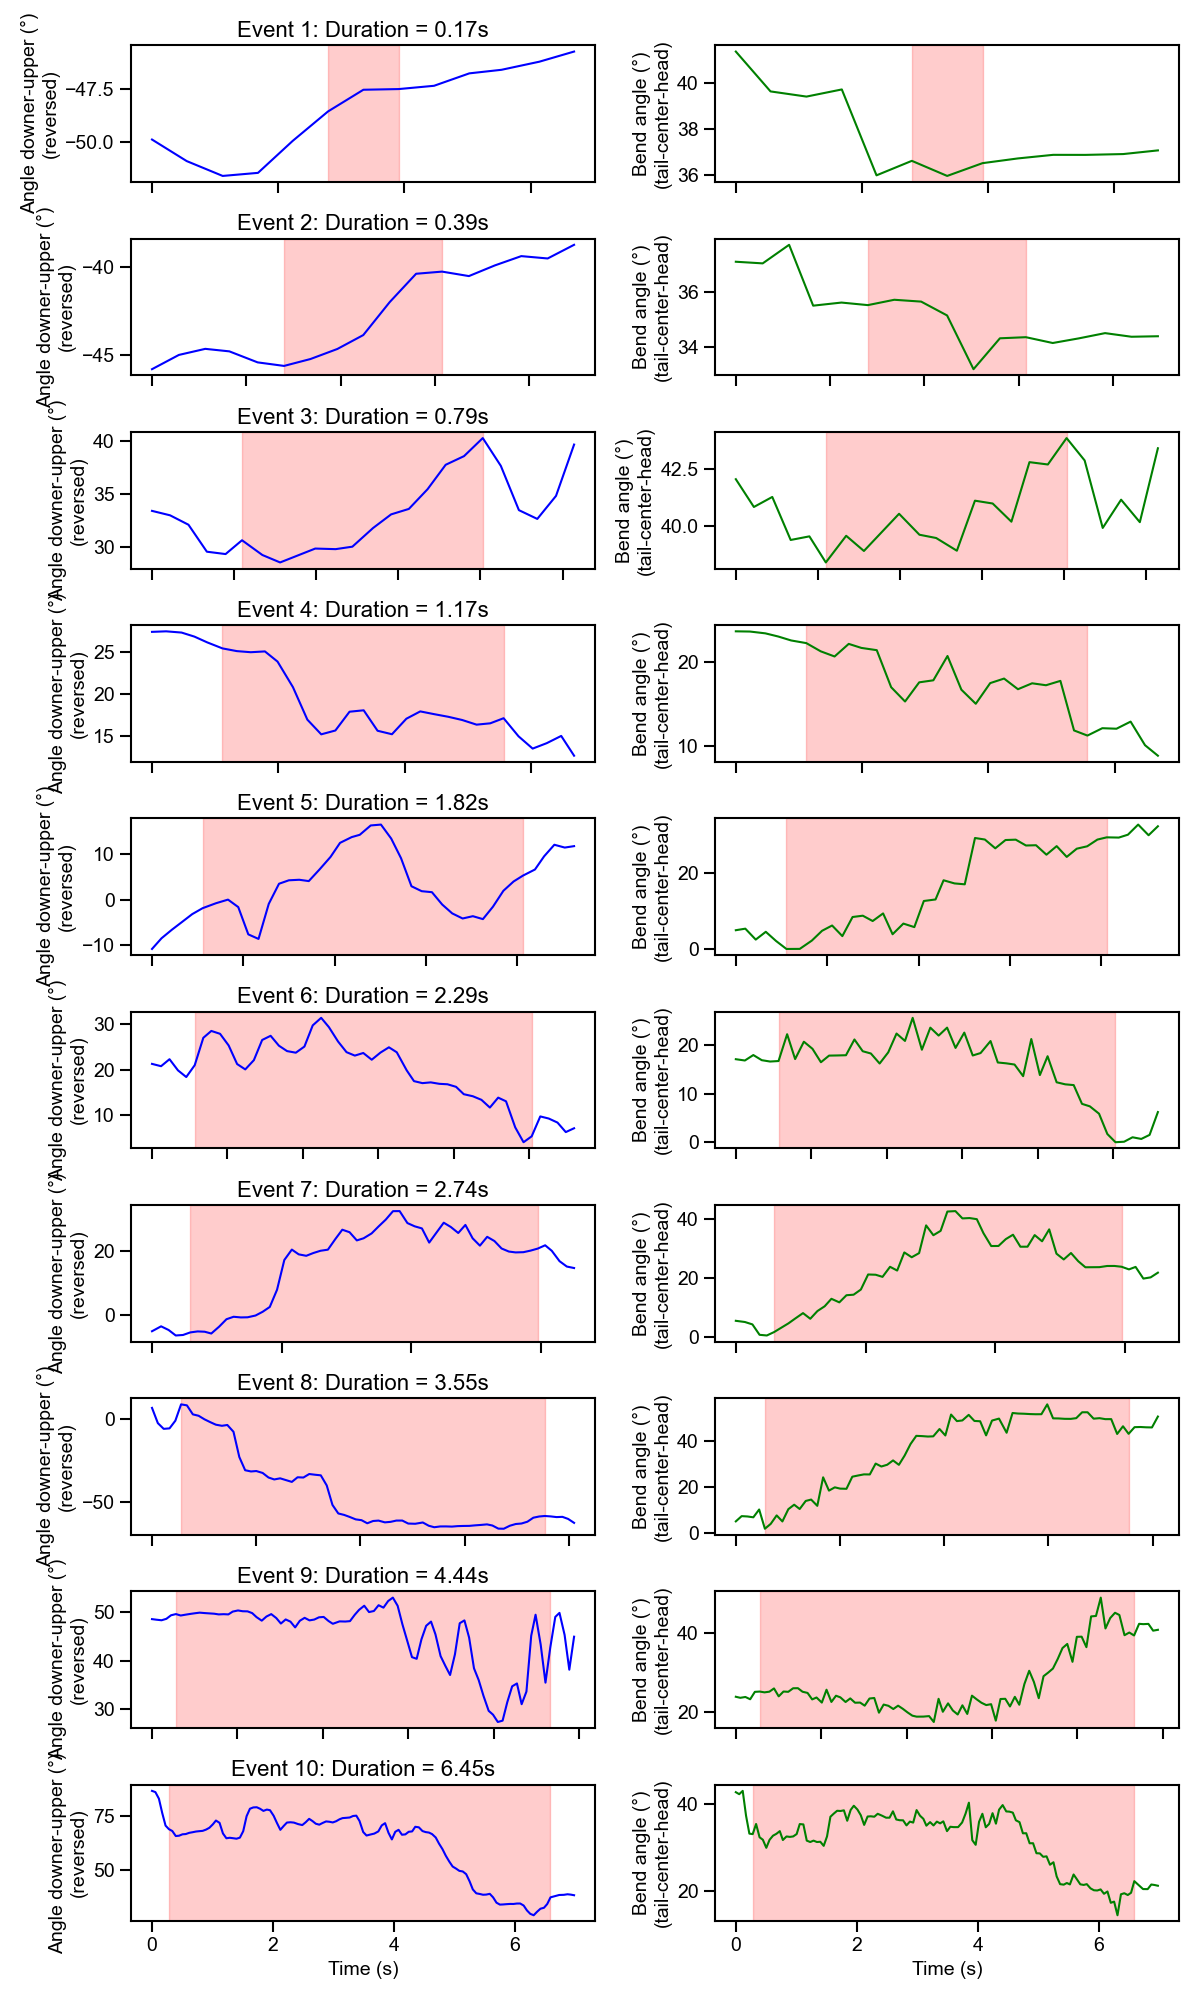

Analysis for larva 20240308_124423_15:
Number of cast events: 106
Mean cast duration: 3.449s
Mean max downer-upper angle: 51.40 degrees
Mean max bend angle: 43.08 degrees
Mean bend amplitude during casts: 28.32 degrees


In [16]:
# Or let the function pick a random larva with good data
results = trx_processor.analyze_cast_head_dynamics(filtered_all_data)

# Print the statistics
print(f"Analysis for larva {results['larva_id']}:")
print(f"Number of cast events: {results['n_events']}")
print(f"Mean cast duration: {results['mean_duration']:.3f}s")
print(f"Mean max downer-upper angle: {results['mean_max_angle_du']:.2f} degrees")
print(f"Mean max bend angle: {results['mean_max_bend_angle']:.2f} degrees")
print(f"Mean bend amplitude during casts: {results['mean_bend_amplitude']:.2f} degrees")

In [17]:
# # Import libraries
# import numpy as np
# import matplotlib.pyplot as plt
# from src import trx_processor

# # Apply the analysis function
# results = trx_processor.analyze_perpendicular_cast_directions(filtered_all_data, angle_width=45)

# # Print summary statistics
# print(f"Analysis completed for {results['larvae_processed']} larvae")
# print(f"Total casts analyzed: {sum(results['total_counts'].values())}")

# # Print probabilities
# print("\nCast Direction Probabilities:")
# print(f"  Upstream: {results['probabilities']['upstream']:.3f} ({results['total_counts']['upstream']} casts)")
# print(f"  Downstream: {results['probabilities']['downstream']:.3f} ({results['total_counts']['downstream']} casts)")

# # Print statistical results
# chi2, p_chi2 = results['chi2_result']
# significance = "*" * sum([p_chi2 < threshold for threshold in [0.05, 0.01, 0.001]])
# print(f"\nChi-square test results:")
# print(f"  chi2: {chi2:.4f}")
# print(f"  p-value: {p_chi2:.4f} {significance}")

# # Add t-test results if available
# if results['ttest_result'] is not None:
#     t_stat, p_val = results['ttest_result']
#     significance = "*" * sum([p_val < threshold for threshold in [0.05, 0.01, 0.001]])
#     print(f"\nPaired t-test results:")
#     print(f"  t-statistic: {t_stat:.4f}")
#     print(f"  p-value: {p_val:.4f} {significance}")

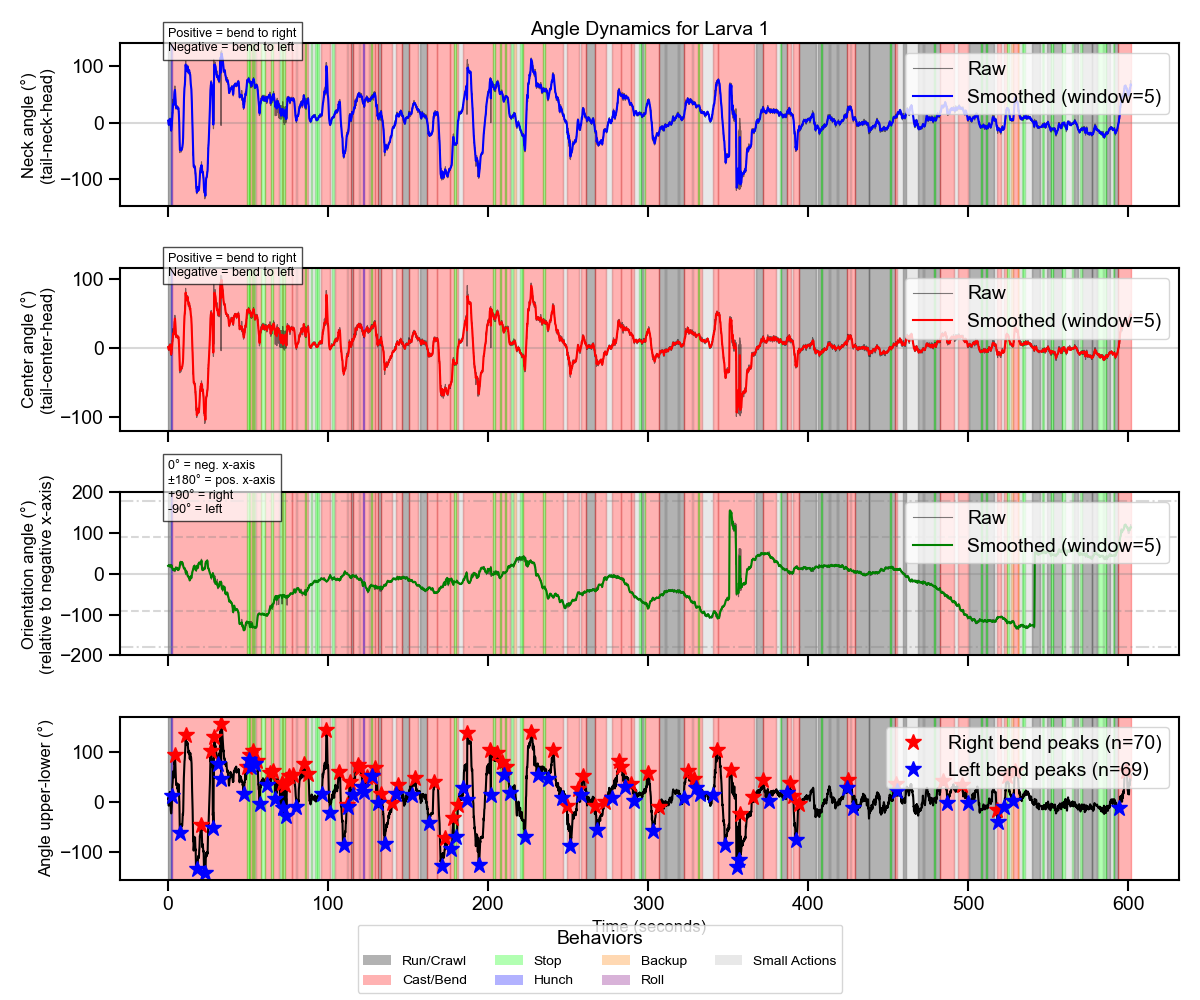

Plotted angle dynamics for larva 1 over 601.3 seconds
Detected 70 right bend peaks and 69 left bend peaks during cast/bend events


{'larva_id': 1,
 'time': array([2.47000e-01, 3.00000e-01, 3.60000e-01, ..., 6.01389e+02,
        6.01450e+02, 6.01506e+02], shape=(10735,)),
 'angle_neck': array([ 4.63908584,  4.73952412,  2.82957018, ..., 75.07929616,
        67.57938108, 64.64534433], shape=(10735,)),
 'angle_neck_smooth': array([ 3.87769914,  3.13452822,  1.80993742, ..., 68.61935137,
        68.18651006, 67.50953715], shape=(10735,)),
 'angle_center': array([ 1.16232846,  2.47094145,  0.49620325, ..., 53.92050432,
        47.98647861, 46.30580158], shape=(10735,)),
 'angle_center_smooth': array([ 1.25196713,  0.89124685,  0.21191918, ..., 48.96300906,
        48.68596397, 48.21783814], shape=(10735,)),
 'orientation_angle': array([ 19.64668374,  20.55150713,  18.69923605, ..., 121.40904557,
        115.1498555 , 112.00886801], shape=(10735,)),
 'orientation_angle_smooth': array([ 19.90555485,  19.96080696,  20.07964353, ..., 115.94818337,
        115.44691291, 114.78920172], shape=(10735,)),
 'angle_upper_lower': 

In [18]:
# trx_processor.plot_larva_angle_dynamics(filtered_all_data)
# Or with specific larva:
trx_processor.plot_larva_angle_dynamics(filtered_extracted_data, larva_id=1)


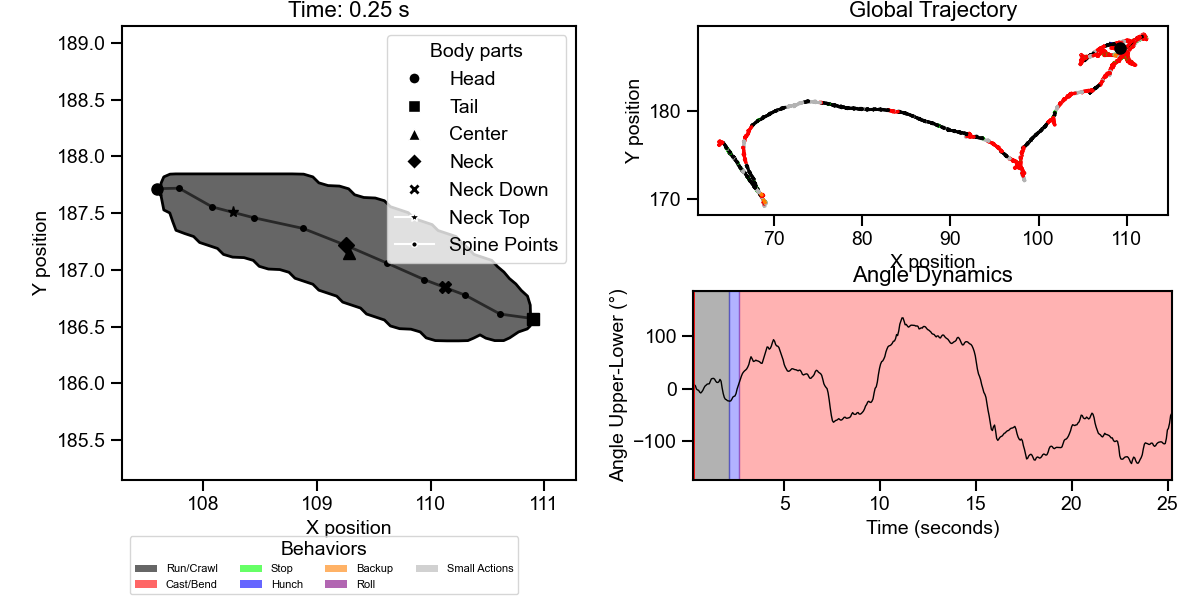

In [19]:
first_larva = sorted(filtered_extracted_data.keys())[0]
trx_processor.plot_behavioral_contour_with_global_trajectory(filtered_extracted_data, first_larva)

/Users/sharbat/Projects/anemotaxis/src/trx_processor.py:4032: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['90°\n(Right)', '45°', '0°\n(Downstream)', '315°', '270°\n(Left)', '225°', '180°\n(Upstream)', '135°'])


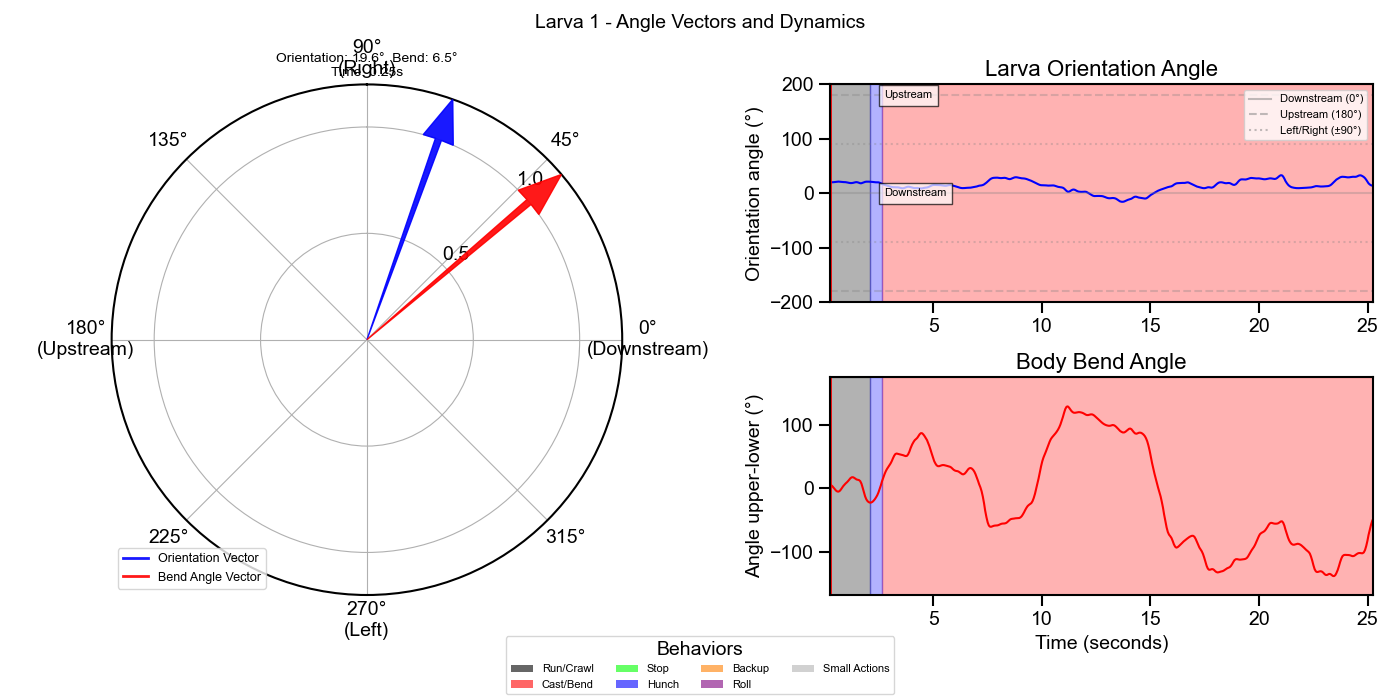

{'larva_id': 1,
 'time': array([2.47000e-01, 3.00000e-01, 3.60000e-01, ..., 6.01389e+02,
        6.01450e+02, 6.01506e+02], shape=(10735,)),
 'orientation_angles': array([ 19.64668374,  20.55150713,  18.69923605, ..., 121.40904557,
        115.1498555 , 112.00886801], shape=(10735,)),
 'orientation_angles_smooth': array([ 19.90555485,  19.96080696,  20.07964353, ..., 115.94818337,
        115.44691291, 114.78920172], shape=(10735,)),
 'angle_upper_lower_deg': array([ 6.4898138 ,  7.74879316,  5.54130495, ..., 54.59396581,
        53.8733132 , 53.67846376], shape=(10735,)),
 'angle_upper_lower_deg_smooth': array([ 6.1287503 ,  5.22099416,  3.42426491, ..., 53.32948222,
        53.72686965, 53.82586129], shape=(10735,)),
 'states': array([1., 1., 1., ..., 2., 2., 2.], shape=(10735,))}

In [20]:
first_larva = sorted(filtered_extracted_data.keys())[0]
trx_processor.plot_larva_angle_vectors(filtered_extracted_data, larva_id=first_larva, smooth_window=5, time_window=50)


/Users/sharbat/Projects/anemotaxis/src/trx_processor.py:4504: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_polar.set_xticklabels(['90°\n(R)', '45°', '0°\n(D)', '315°', '270°\n(L)', '225°', '180°\n(U)', '135°'],


/Users/sharbat/Projects/anemotaxis/src/trx_processor.py:4811: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


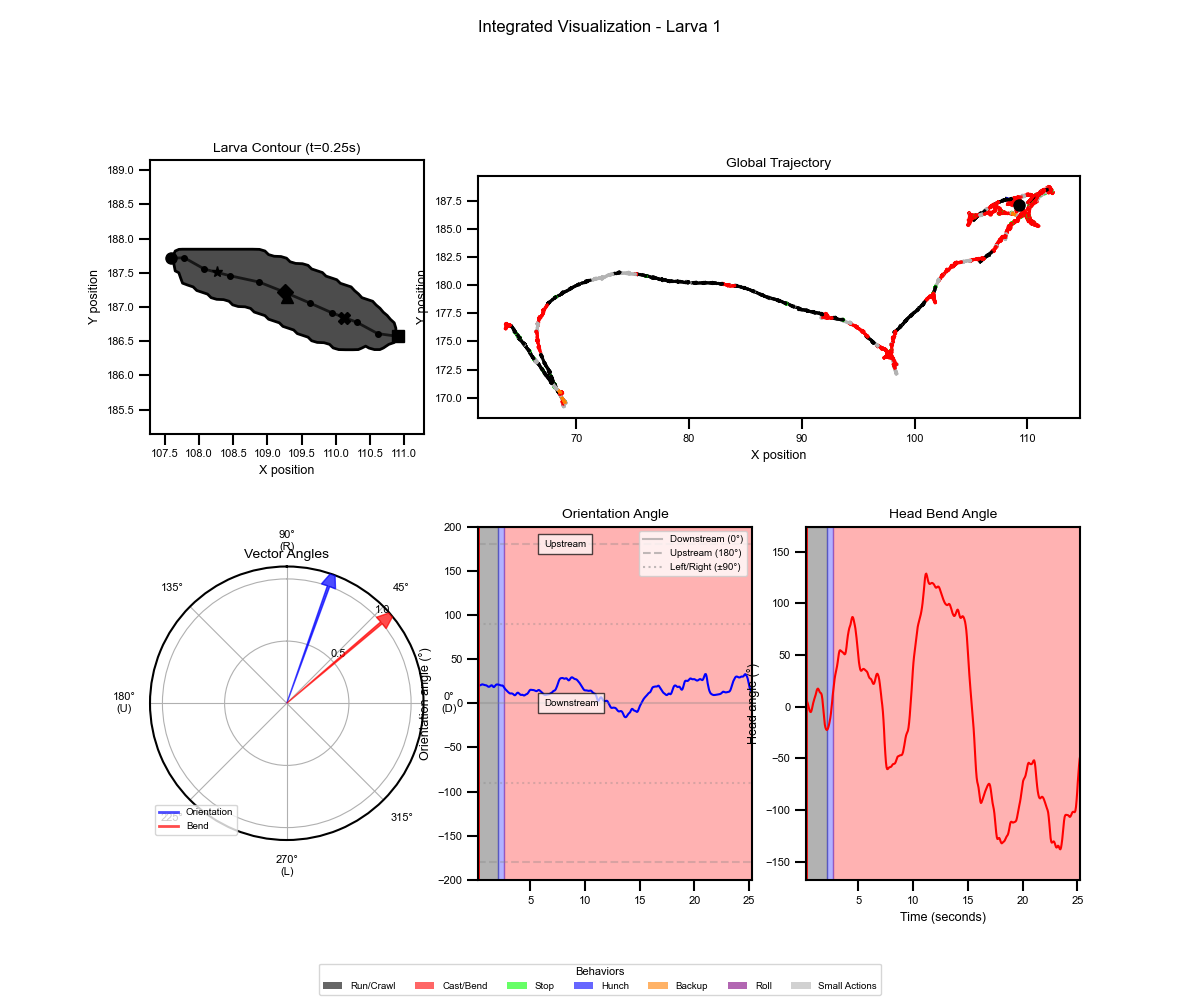

{'larva_id': 1,
 'time': array([2.47000e-01, 3.00000e-01, 3.60000e-01, ..., 6.01389e+02,
        6.01450e+02, 6.01506e+02], shape=(10735,)),
 'orientation_angles': array([ 19.64668374,  20.55150713,  18.69923605, ..., 121.40904557,
        115.1498555 , 112.00886801], shape=(10735,)),
 'orientation_angles_smooth': array([ 19.90555485,  19.96080696,  20.07964353, ..., 115.94818337,
        115.44691291, 114.78920172], shape=(10735,)),
 'angle_upper_lower_deg': array([ 6.4898138 ,  7.74879316,  5.54130495, ..., 54.59396581,
        53.8733132 , 53.67846376], shape=(10735,)),
 'angle_upper_lower_deg_smooth': array([ 6.1287503 ,  5.22099416,  3.42426491, ..., 53.32948222,
        53.72686965, 53.82586129], shape=(10735,)),
 'states': array([1., 1., 1., ..., 2., 2., 2.], shape=(10735,))}

In [21]:
first_larva = sorted(filtered_extracted_data.keys())[0]
trx_processor.plot_larva_integrated_visualization(filtered_extracted_data, larva_id=first_larva, smooth_window=5, time_window=50)
